# connect to db

In [1]:
import pandas
import configparser
import psycopg2

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

db = config['myaws']['db']
host = config['myaws']['host']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [3]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname = db)

# Q1

In [17]:
sql = "select * from student"

In [18]:
df = pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_9660/831397919.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


,s_email,s_name,major
0,s5@jmu.edu,s3,IA


# Q2

In [19]:
sql = """
select professor.p_name,
course.c_name
from professor
inner join course
on professor.p_email = course.p_email
"""

In [20]:
df = pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_9660/831397919.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


,p_name,c_name
0,p2,mongodb
1,p3,postgresql
2,p3,twitter


# Q3

In [21]:
sql = """
select c_number, count(*) as num_student
from enroll
group by c_number
order by num_student desc
"""

In [22]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x='c_number',y='num_student')

/tmp/ipykernel_9660/1433585107.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


TypeError: no numeric data to plot

# Q4

In [23]:
sql = """
select professor.p_name, count(course.c_name) as num_course
from professor
inner join course on professor.p_email = course.p_email
group by professor.p_name
order by num_course desc
"""

/tmp/ipykernel_9660/720569572.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


<Axes: xlabel='p_name'>

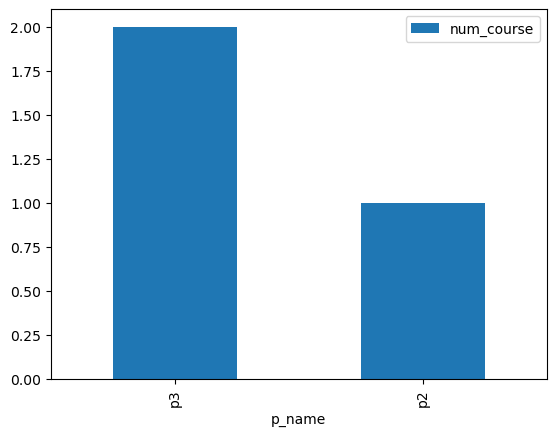

In [25]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x='p_name',y='num_course')

# Q5

In [26]:
cur = conn.cursor()

In [27]:
sql = """
insert into professor(p_email,p_name,office)
values  ('p4@jmu.edu','p4','o4') ;
"""

In [28]:
cur.execute(sql)

In [29]:
conn.commit()

In [31]:
df = pandas.read_sql_query('select * from professor',conn)
df[:]

/tmp/ipykernel_9660/2361312252.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from professor',conn)


,p_email,p_name,office
0,p1@jmu.edu,p1,o1
1,p2@jmu.edu,p2,o2
2,p3@jmu.edu,p3,o3
3,p4@jmu.edu,p4,o4


In [32]:
sql = """
insert into course(c_number,c_name,room,p_email)
values  ('c5','linkedin','r2','p4@jmu.edu')
"""

In [33]:
cur.execute(sql)

In [34]:
conn.commit()

In [35]:
df = pandas.read_sql_query('select * from course',conn)
df[:]

/tmp/ipykernel_9660/2981575292.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from course',conn)


,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
